Import Packages

In [2]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from pathlib import Path
import warnings
from skimage.feature import hog
import matplotlib.pyplot as plt
import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

Load Input Data - Images Numpy Array, Labels Numpy Array and Hog Features Numpy Array

**NOTE**: 
If you want to manually generate the hog features, please comment the line to load hog_features

In [7]:
Img = np.load("drive/MyDrive/OneDrive_1_11-26-2021/Train_Images.npy")
Labels = np.load("drive/MyDrive/OneDrive_1_11-26-2021/Train_Labels.npy")

Extract Features using Histogram of Oriented Gradient (HOG)

**NOTE** : 
Please run this cell only if you want to extract hog features from input images. Do not run this cell if you are loading the hog_features numpy array

In [26]:
ppcr = 15
ppcc = 15
hog_images = []
hog_features = []
for image in Img:
 blur = cv.GaussianBlur(image,(5,5),0) #Gaussian Filtering
 fd,hog_image = hog(blur, orientations=15, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
 hog_images.append(hog_image)
 hog_features.append(fd)
hog_features = np.array(hog_features)
hog_features.shape

(29920, 4860)

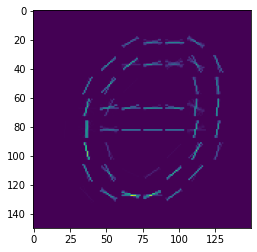

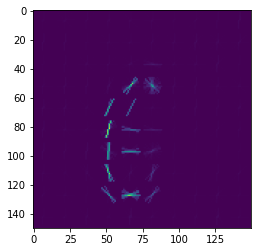

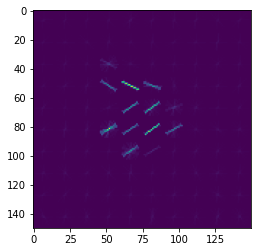

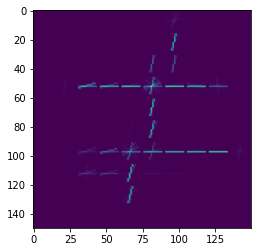

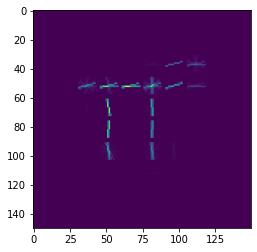

In [29]:
for img in hog_images[400:405]:
    plt.imshow(img)
    plt.show()

Split into train and test data

In [8]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(hog_features,Labels,test_size=0.2,stratify=Labels)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(23936, 4860), (23936,)
Test data and target sizes: 
(5984, 4860), (5984,)


K-Nearest Neighbor Classifier

In [9]:
test_accuracy = []
for i in range(2,20):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train, y_train)
  test_accuracy = classifier.score(X_test, y_test)
  print("Neighbours",i,test_accuracy)

Neighbours 2 0.7212566844919787
Neighbours 3 0.7202540106951871
Neighbours 4 0.7180815508021391
Neighbours 5 0.7078877005347594
Neighbours 6 0.7080548128342246
Neighbours 7 0.6978609625668449
Neighbours 8 0.6915106951871658
Neighbours 9 0.6846590909090909
Neighbours 10 0.6851604278074866
Neighbours 11 0.6734625668449198
Neighbours 12 0.6699532085561497
Neighbours 13 0.6659425133689839
Neighbours 14 0.6681149732620321
Neighbours 15 0.6584224598930482
Neighbours 16 0.6554144385026738
Neighbours 17 0.6493983957219251
Neighbours 18 0.6482286096256684
Neighbours 19 0.6457219251336899


In [12]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       240
         1.0       0.86      0.79      0.82       240
         2.0       0.79      0.90      0.84       240
         3.0       0.86      0.68      0.76       240
         4.0       0.85      0.81      0.83       240
         5.0       0.86      0.87      0.87       239
         6.0       0.88      0.79      0.83       239
         7.0       0.62      0.75      0.68       239
         8.0       0.78      0.91      0.84       240
         9.0       0.56      0.60      0.58       239
        10.0       0.65      0.50      0.56       240
        11.0       0.70      0.78      0.74       239
        12.0       0.52      0.80      0.63       240
        13.0       0.57      0.91      0.70       239
        14.0       0.76      0.62      0.68       239
        15.0       0.89      0.60      0.72       239
        16.0       0.95      0.62      0.75       239
        17.0       0.62    

In [ ]:
#np.save('drive/MyDrive/features1.npy',hog_features)

SVM Model

In [10]:
from sklearn.svm import SVC

In [11]:
svm = SVC(kernel='linear', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.8709893048128342
